In [ ]:
Q 1) What is unsupervised learning in the context of machine learning?
>> a type of machine learning that finds hidden patterns and structures in unlabeled data without human guidance

In [ ]:
Q 2) How does K-Means clustering algorithm work
>>  iteratively grouping similar data points into a predefined number (K) of clusters, finding centers (centroids) for each, and reassigning points 
    to the nearest centroid until the cluster assignments stabilize

In [ ]:
Q 3) Explain the concept of a dendrogram in hierarchical clustering
>> a tree-like diagram that visually represents the nested grouping of data points, showing how individual items merge into clusters and how those
   clusters combine, with the height of branches indicating the distance or dissimilarity between them

In [ ]:
Q 4) What is the main difference between K-Means and Hierarchical Clustering?
>> 1.Number of Clusters (\(K\)): K-Means needs \(K\) beforehand, while Hierarchical does not.
   2.Sensitivity: K-Means is more robust to outliers, while Hierarchical is more sensitive. 

In [ ]:
Q 5) What are the advantages of DBSCAN over K-Means?
>> identifying arbitrary, non-spherical cluster shapes, automatically determining the number of clusters, and robustly handling noise and outliers

In [ ]:
Q 6) When would you use Silhouette Score in clustering
>> to evaluate the quality of clustering in unsupervised learning by measuring how similar a data point is to its own cluster (cohesion) compared to
   other clusters (separation)

In [ ]:
Q 7) What are the limitations of Hierarchical Clustering?
>> It is highly sensitive to noise and outliers, cannot reverse merge/split decisions once made, and can produce difficult-to-interpret dendrograms. 

In [ ]:
Q 8) Why is feature scaling important in clustering algorithms like K-Means
>> the algorithm relies on Euclidean distance to calculate similarity between data points.

In [ ]:
Q 9) How does DBSCAN identify noise points
>> by classifying data points that reside in low-density, sparse regions—failing to meet minimum density requirements—as outliers.

In [ ]:
Q 10) Define inertia in the context of K-Means
>> a metric that measures the internal coherence of the clusters.

In [ ]:
Q 11) What is the elbow method in K-Means clustering?
>> The elbow method is a heuristic used to determine the optimal number of clusters (\(k\)) in K-means clustering by plotting the within-cluster sum
     of squares (WCSS) or inertia against the number of clusters

In [ ]:
Q 12) Describe the concept of "density" in DBSCAN
>> In DBSCAN, density is defined by the number of data points located within a specified radius (\(\epsilon \) - epsilon) around a given point,
  determining if a region is sufficiently crowded to form or expand a cluster

In [ ]:
Q 13) Can hierarchical clustering be used on categorical data
>> Yes, hierarchical clustering can be used on categorical data

In [ ]:
Q 14) What does a negative Silhouette Score indicate?
>> a data point or cluster has been improperly assigned

In [ ]:
Q 15) Explain the term "linkage criteria" in hierarchical clustering
>> mathematical rules that determine how the distance between two clusters (or sets of observations) is calculated, guiding the merging process to
   build the dendrogram.

In [ ]:
Q 16) Why might K-Means clustering perform poorly on data with varying cluster sizes or densities
>> its underlying mathematical assumptions do not align with these data structures

In [ ]:
Q 17) What are the core parameters in DBSCAN, and how do they influence clustering?
>> Epsilon (\(\epsilon \) or eps) and MinPts (min_samples)

In [ ]:
Q 18) How does K-Means++ improve upon standard K-Means initialization
>> by using a smart, probabilistic initialization strategy that spreads out initial cluster centroids, rather than picking them randomly.

In [ ]:
Q 19) What is agglomerative clustering?
>> a bottom-up hierarchical machine learning algorithm that groups similar data points into clusters by initially treating each point as a single
    cluster and iteratively merging the closest pairs. 

In [ ]:
Q 20) What makes Silhouette Score a better metric than just inertia for model evaluation?
>>  it evaluates both cohesion (how close points are in a cluster) and separation (how far clusters are from each other)

# PRACTICAL

In [ ]:
Q 21) Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a 
scatter plot

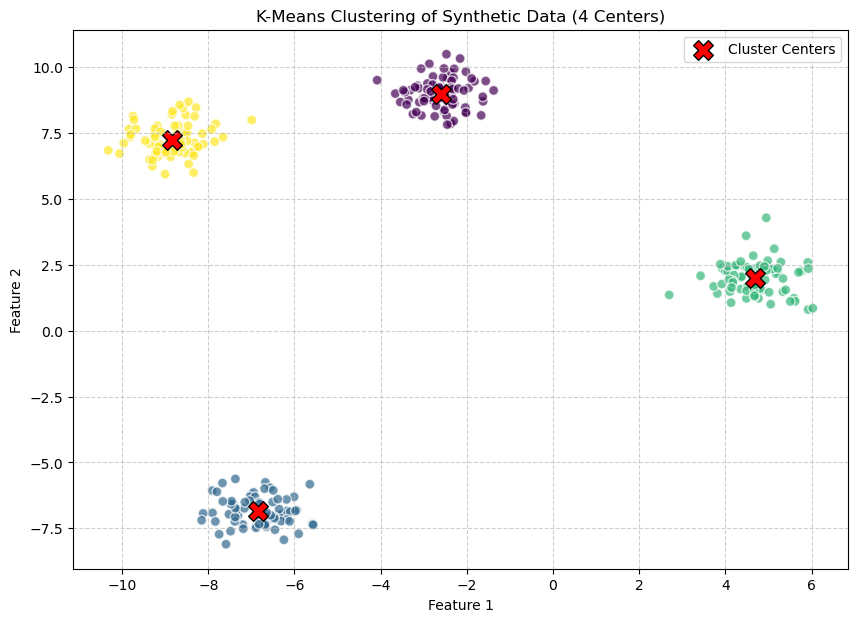

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)


n_samples = 300
n_centers = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=0.60, random_state=42) #

kmeans = KMeans(n_clusters=n_centers, init='k-means++', n_init=10, random_state=42) #
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 7))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, edgecolors='w') #

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Cluster Centers') #

plt.title('K-Means Clustering of Synthetic Data (4 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
Q 22) Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 
predicted labels

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data


agg_clustering = AgglomerativeClustering(n_clusters=3)

predicted_labels = agg_clustering.fit_predict(X)

print(predicted_labels[:10])


[1 1 1 1 1 1 1 1 1 1]


In [ ]:
Q 23) Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

C:\Users\User\AppData\Local\Temp\ipykernel_8012\3887244982.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1],


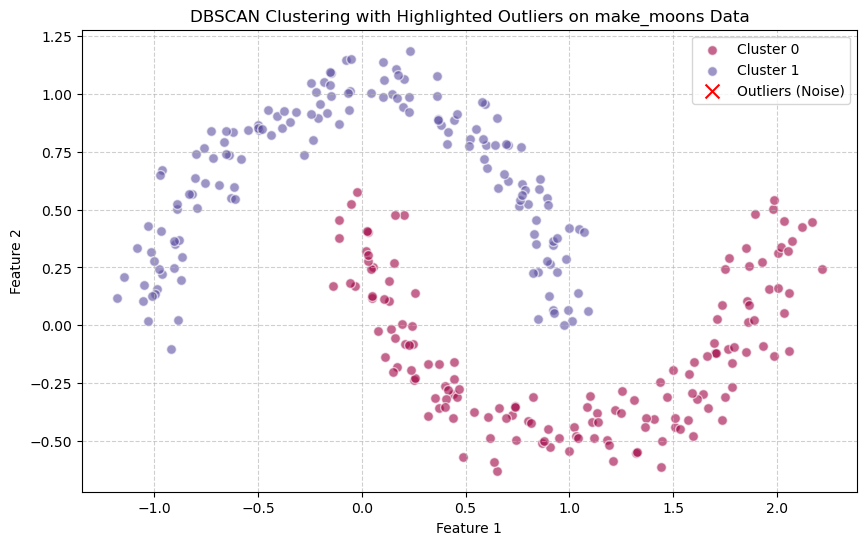

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np


X, y = make_moons(n_samples=300, noise=0.08, random_state=42)


dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X)

outlier_mask = (clusters == -1)
clustered_mask = (clusters != -1)

plt.figure(figsize=(10, 6))

unique_clusters = set(clusters[clustered_mask])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster_id, color in zip(unique_clusters, colors):
    if cluster_id != -1:
        cluster_points = X[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], s=50, label=f'Cluster {cluster_id}', alpha=0.6, edgecolors='w')

plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1],
            c='red', s=100, marker='x', label='Outliers (Noise)',
            edgecolors='k') 

plt.title('DBSCAN Clustering with Highlighted Outliers on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
Q 24) Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each 
cluster

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("Size of each cluster:")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} samples")

Size of each cluster:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
Q 25) Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

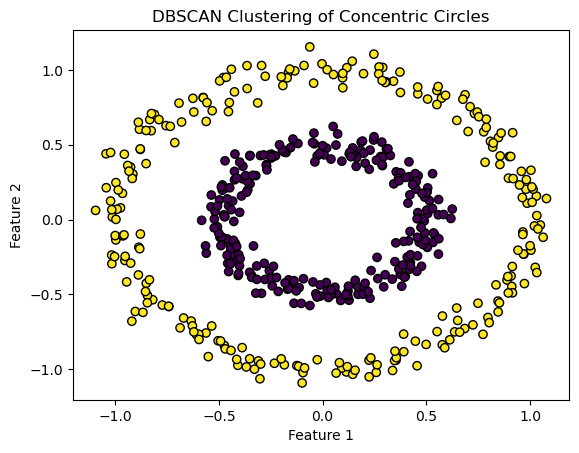

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)


dbscan = DBSCAN(eps=0.15, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Plot the result
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
Q 26) Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster 
centroids

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_
print("Cluster Centroids (30 features each):\n", centroids)


Cluster Centroids (30 features each):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


In [ ]:
Q 27) Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with 
DBSCAN

Estimated number of clusters found by DBSCAN: 5
Estimated number of noise points found by DBSCAN: 58
DBSCAN parameters used: eps=0.5, min_samples=5


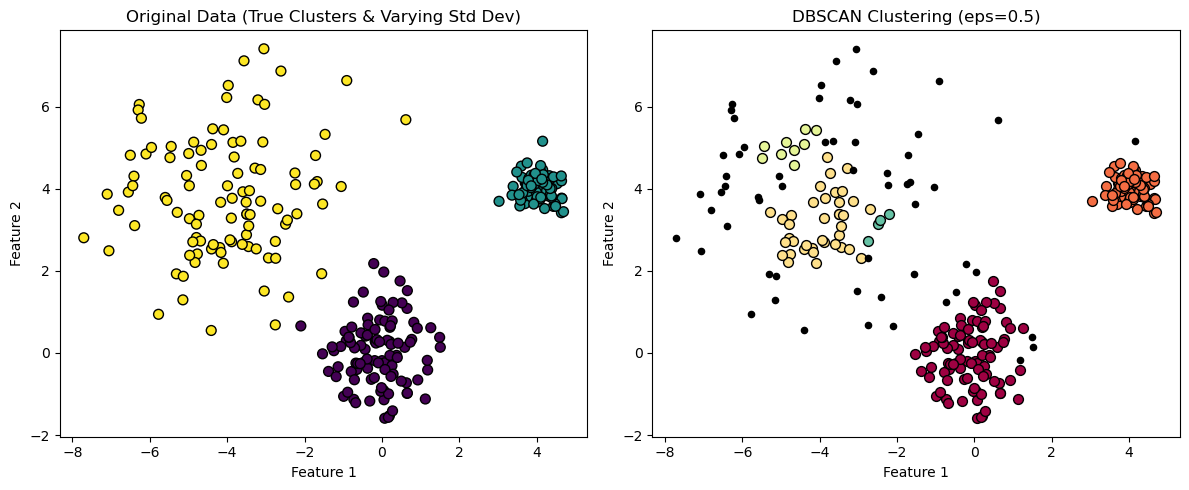

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


n_samples = 300
centers = [[0, 0], [4, 4], [-4, 4]]

cluster_stds = [0.8, 0.3, 1.5]
random_state = 42

X, y_true = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=cluster_stds, 
    random_state=random_state
)


eps_value = 0.5
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters found by DBSCAN: {n_clusters}")
print(f"Estimated number of noise points found by DBSCAN: {n_noise}")
print(f"DBSCAN parameters used: eps={eps_value}, min_samples={min_samples_value}")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Original Data (True Clusters & Varying Std Dev)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), s=50 if k != -1 else 20, marker='o', edgecolor='k')

plt.title(f"DBSCAN Clustering (eps={eps_value})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [ ]:
Q 28) Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

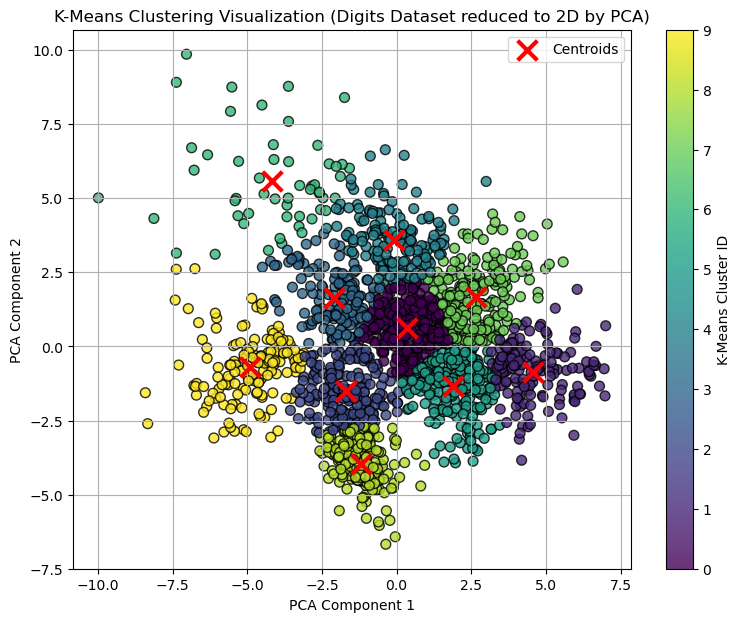

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


digits = load_digits()
data = scale(digits.data)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, random_state=42)
kmeans.fit(reduced_data)
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(9, 7))


scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels,
                      cmap='viridis', edgecolor='k', s=50, alpha=0.8)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3,
            color='red', zorder=10, label='Centroids')

plt.title('K-Means Clustering Visualization (Digits Dataset reduced to 2D by PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(scatter, label='K-Means Cluster ID')
plt.grid(True)
plt.show()

In [ ]:
Q 29) Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

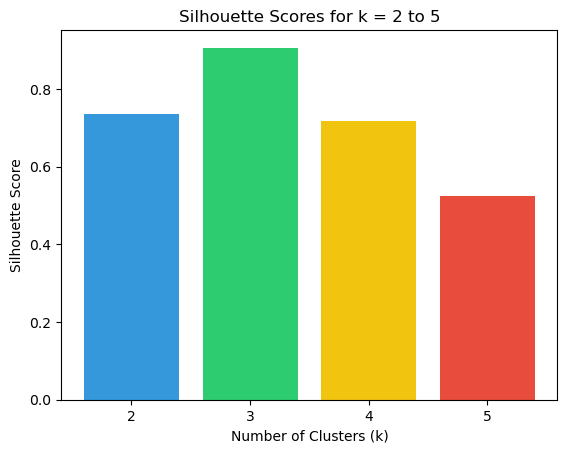

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

k_values = [2, 3, 4, 5]
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(k_values, scores, color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.xticks(k_values)
plt.show()

In [ ]:
Q 30) Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

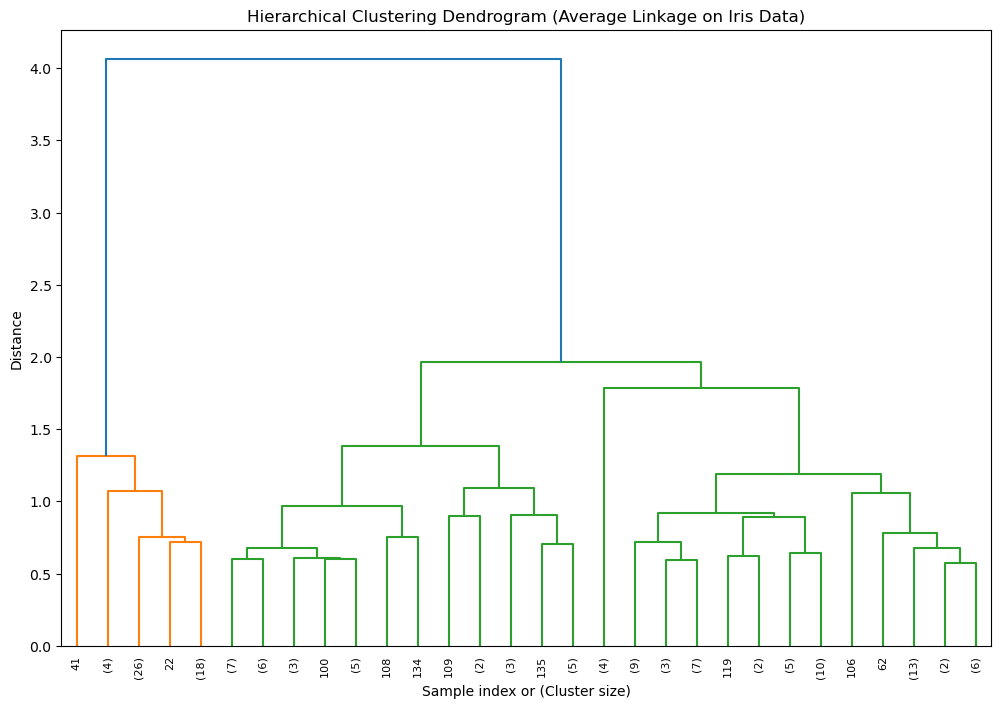

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

iris = load_iris()
X = iris.data 

distance_matrix = pdist(X, metric='euclidean')

Z = linkage(distance_matrix, method='average')

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage on Iris Data)')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=30,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.show()

In [ ]:
Q 33) Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot 
the result

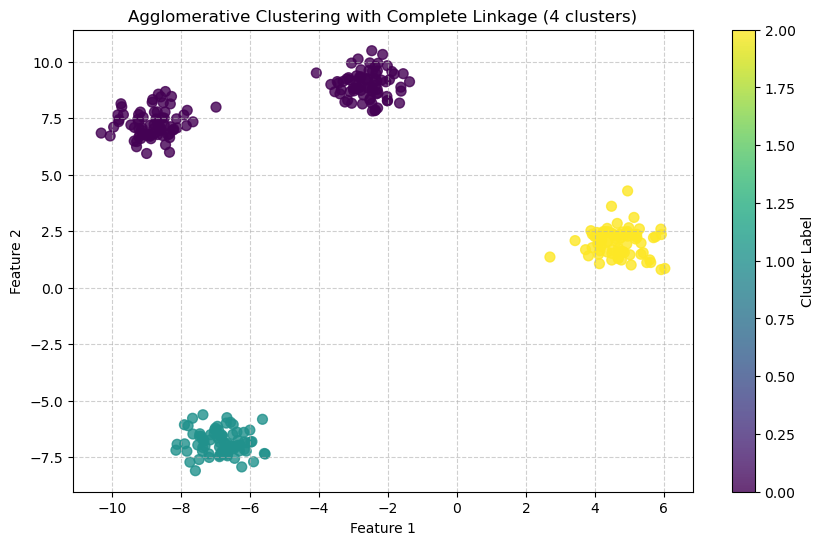

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np


n_samples = 300
n_centers = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_centers,
                       cluster_std=0.60, random_state=42)

agg_labels = agg_clustering.fit_predict(X)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.8)

plt.title(f'Agglomerative Clustering with Complete Linkage ({n_centers} clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
Q 35) Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with 
single linkage

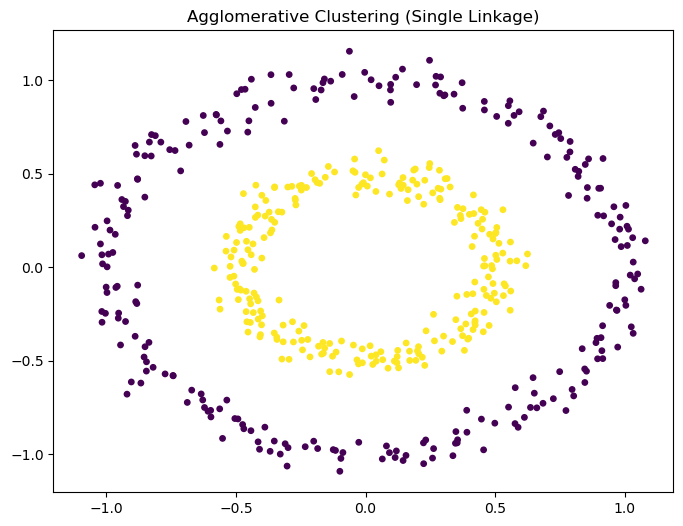

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import numpy as np


X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)


model = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = model.fit_predict(X)

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15)
plt.title('Agglomerative Clustering (Single Linkage)')
plt.show()


In [ ]:
Q 36) Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding 
noise

In [15]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

unique_clusters = np.unique(clusters)
cluster_labels = unique_clusters[unique_clusters != -1]
num_clusters = len(cluster_labels)

print(f"Number of clusters found (excluding noise): {num_clusters}")
print(f"Cluster labels found: {unique_clusters}")


Number of clusters found (excluding noise): 0
Cluster labels found: [-1]


In [ ]:
Q 37) Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the 
data points

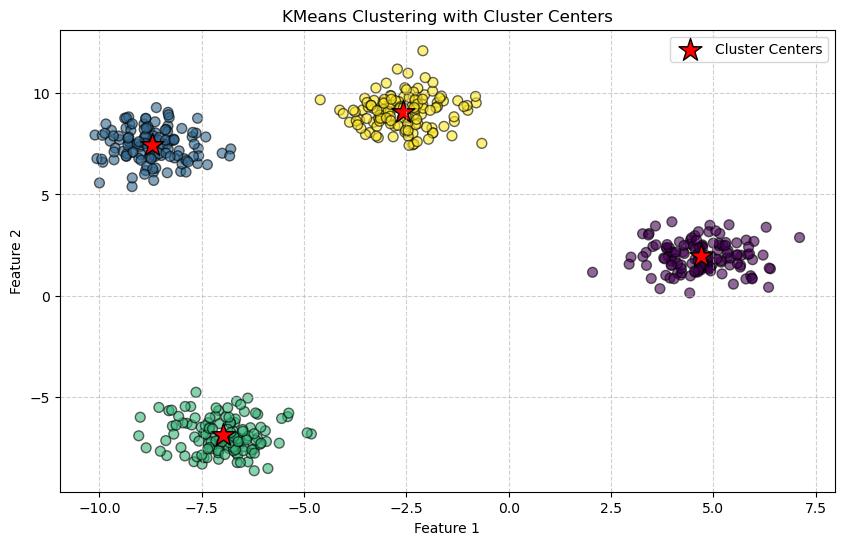

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

N_SAMPLES = 500       
N_CLUSTERS = 4        
RANDOM_STATE = 42     

X, y_true = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS,
                       cluster_std=0.8, random_state=RANDOM_STATE)

kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, random_state=RANDOM_STATE)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis',
            alpha=0.6, edgecolor='k')

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=1.0,
            marker='*', edgecolor='black', label='Cluster Centers')

plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
Q 38) Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_
n_noise = list(labels).count(-1)

print(f"Number of samples identified as noise: {n_noise}")


Number of samples identified as noise: 17


In [ ]:
Q 39) Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the 
clustering result

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


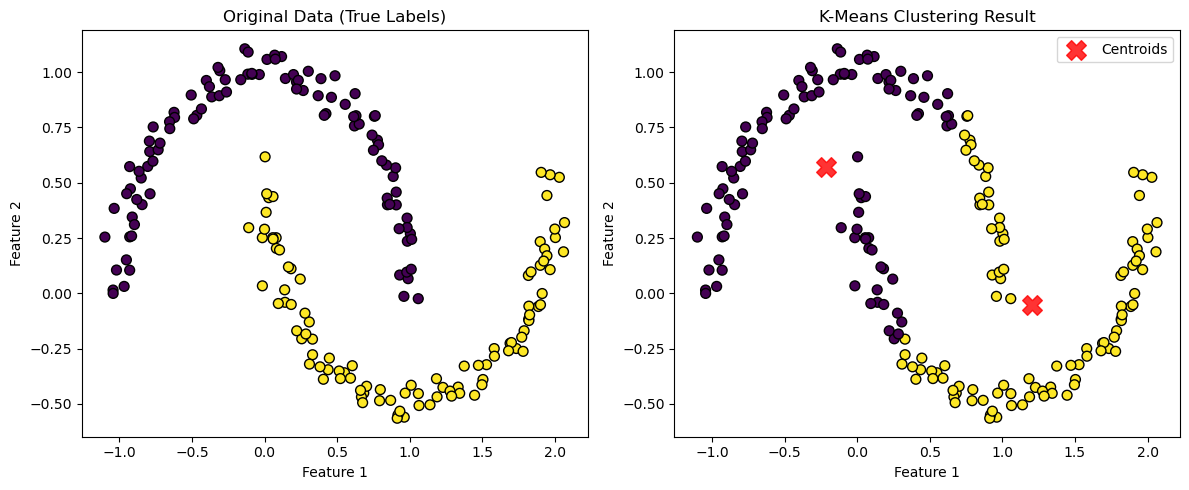

In [19]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


X, y_true = make_moons(n_samples=200, noise=0.05, random_state=42)


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis', edgecolors='k')
ax1.set_title("Original Data (True Labels)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax2.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolors='k')
ax2.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.8, label='Centroids')
ax2.set_title("K-Means Clustering Result")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
Q 40) Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D 
scatter plot.

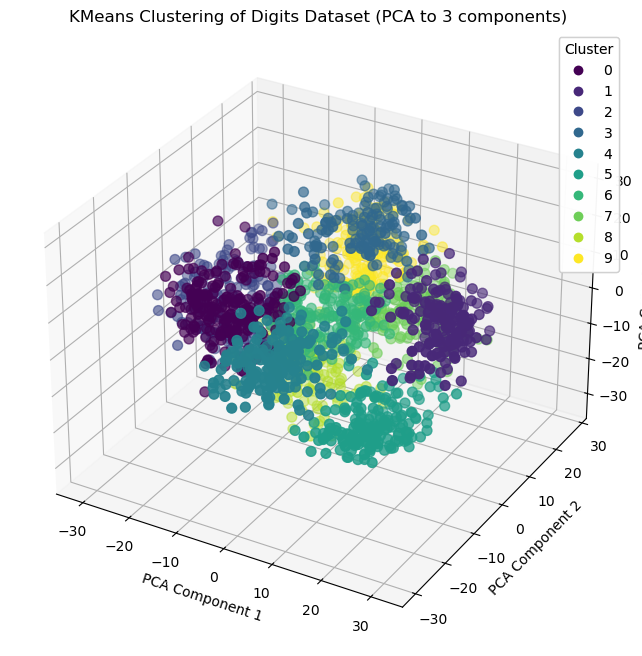

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X) 


n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca) 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=kmeans_labels, cmap='viridis', s=50)

ax.set_title('KMeans Clustering of Digits Dataset (PCA to 3 components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar/legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()
